# Library

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.python.keras import Sequential
from math import sqrt;
import tensorflow as tf

# Preprocessing

## Import data

In [2]:
# import data
url = "https://drive.google.com/file/d/1_LBzbPCrkDpksT37LZoIRs8NyeOocCyr/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.shape

(19735, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-11-01 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [5]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
# Jumlah missing value
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<AxesSubplot:xlabel='date'>

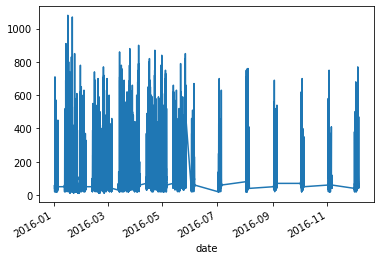

In [7]:
df['Appliances'].plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Appliances', ylabel='Density'>

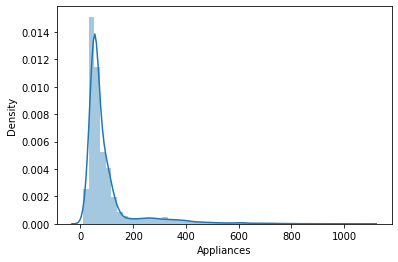

In [8]:
sns.distplot(df['Appliances'])

In [9]:
# Correlation matrix
df.corr()['Appliances']

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015357
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

Feature Extraction (Skenario Atribut)

In [10]:
# Data 1
# All
# df_new = df

# tanpa minus
# df_new = df.drop(df.columns[[5, 13, 15, 17, 19, 21, 22, 26, 27]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[2, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]], axis=1)

# 3 teratas
# df_new = df.drop(df.columns[[2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

# 1 teratas
df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-11-01 17:00:00 to 2016-05-27 18:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Appliances  19735 non-null  int64
dtypes: int64(1)
memory usage: 308.4 KB


In [12]:
values = df_new.values

In [13]:
values.shape

(19735, 1)

## Normalisasi

In [ ]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [14]:
# Z-score
# scaled = stats.zscore(values, axis = 0)

#Z-Score
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

## Convert to Time Series

In [15]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [16]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var1(t)
1,-0.367676,-0.367676
2,-0.367676,-0.465215
3,-0.465215,-0.465215
4,-0.465215,-0.367676
5,-0.367676,-0.465215


In [17]:
reframed.shape

(19734, 2)

In [18]:
# Data 1

# All
# reframed.drop(reframed.columns[[x for x in range(29, 56)]], axis=1, inplace=True)

# no minus
# reframed.drop(reframed.columns[[x for x in range(20, 38)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
# reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

,var1(t-1),var1(t)
1,-0.367676,-0.367676
2,-0.367676,-0.465215
3,-0.465215,-0.465215
4,-0.465215,-0.367676
5,-0.367676,-0.465215


## Split data

In [ ]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model Building

### Random Search

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(18, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='sigmoid')))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.2))

model.compile(loss='mae', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 11)             594       
_________________________________________________________________
dropout (Dropout)            (None, 1, 11)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 11)             759       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 11)             0         
_________________________________________________________________
gru_2 (GRU)                  (None, 1, 11)             759       
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 11)             0         
_________________________________________________________________
gru_3 (GRU)                  (None, 1, 11)             7

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=81, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/66
198/198 [==============================] - 26s 34ms/step - loss: 1.2581 - val_loss: 1.0969
Epoch 2/66
198/198 [==============================] - 4s 18ms/step - loss: 1.0521 - val_loss: 1.0177
Epoch 3/66
198/198 [==============================] - 4s 19ms/step - loss: 1.0225 - val_loss: 1.0101
Epoch 4/66
198/198 [==============================] - 4s 22ms/step - loss: 1.0161 - val_loss: 1.0067
Epoch 5/66
198/198 [==============================] - 3s 17ms/step - loss: 1.0103 - val_loss: 1.0049
Epoch 6/66
198/198 [==============================] - 3s 17ms/step - loss: 1.0085 - val_loss: 1.0037
Epoch 7/66
198/198 [==============================] - 5s 23ms/step - loss: 1.0073 - val_loss: 1.0030
Epoch 8/66
198/198 [==============================] - 4s 18ms/step - loss: 1.0065 - val_loss: 1.0024
Epoch 9/66
198/198 [==============================] - 3s 17ms/step - loss: 1.0058 - val_loss: 1.0019
Epoch 10/66
198/198 [==============================] - 4s 22ms/step - loss: 1.0043 - val_l

### Grid Search

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='sigmoid')))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='sigmoid')))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='sigmoid')))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.2))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 1, 32)             4992      
_________________________________________________________________
dropout_57 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_58 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_58 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_59 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_59 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 1, 1)            

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/50
198/198 [==============================] - 8s 11ms/step - loss: 0.0209 - val_loss: 0.0092
Epoch 2/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 10/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0095 - val_loss: 0.0

# Evaluasi

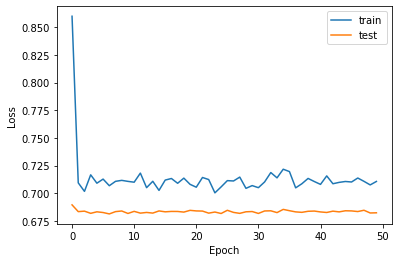

In [ ]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [ ]:
#membuat prediksi training
xhat = model.predict(train_X)
xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
# calculate RMSE
np.seterr(divide='ignore', invalid='ignore')
def mean_absolute_percentage_error(yhat, test_y):
      yhat, test_y = np.array(yhat), np.array(test_y)
      return np.mean(np.abs((yhat, test_y) / test_y))

print('==============minmax===================')
print(f'MAPE test is : %.5f' % (mean_absolute_percentage_error(test_y, yhat)))
print(f'MAPE test invert is : %.5f' % (mean_absolute_percentage_error(inv_y, inv_yhat)))

print('==============zscore===================')
print(f'MAPE test is : %.5f' % (mean_absolute_percentage_error(yhat, test_y)))
print(f'MAPE test invert is : %.5f' % (mean_absolute_percentage_error(inv_yhat, inv_y)))

print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.3f' % rmsetest)
rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

print(f'R2 test is : %.5f' % r2_score(test_y, yhat))
print(f'R2 test invert is : %.5f' % r2_score(inv_y, inv_yhat))

==============minmax===================
MAPE test is : 1.09057
MAPE test invert is : 0.82797
==============zscore===================
MAPE test is : 1.82951
MAPE test invert is : 1.69656
RMSE Testing is : 1.118
RMSE Testing invert is : 114.641
R2 test is : -0.25034
R2 test invert is : -0.25034


Actual : [[-0.36767572]
 [-0.46521548]
 [-0.46521548]
 ...
 [ 1.68065927]
 [ 3.14375569]
 [ 3.24129545]]
Predicted: [[0.5001176 ]
 [0.5001176 ]
 [0.5001499 ]
 ...
 [0.5000234 ]
 [0.49955577]
 [0.4992968 ]]


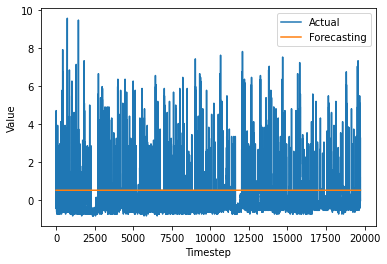

In [ ]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.plot(test_y, label='Actual')
pyplot.plot(yhat, label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

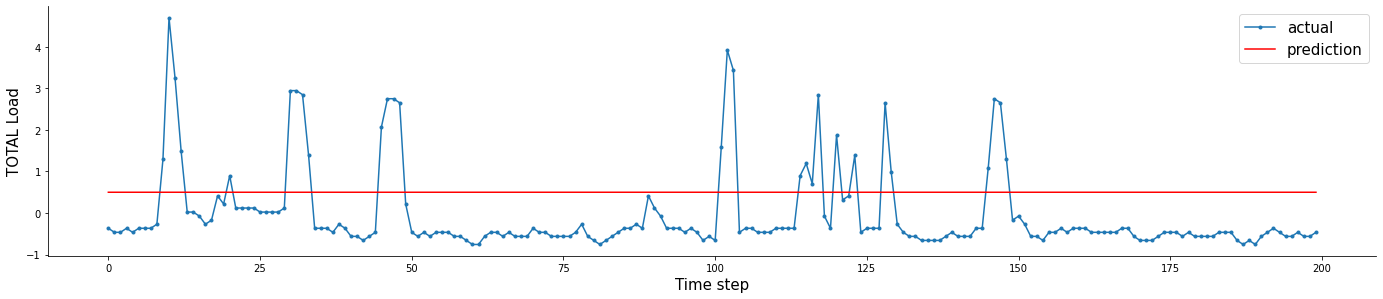

In [ ]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(20,4))
pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('TOTAL Load', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

# 5 run grid

## tanh zscore

Epoch 1/50
198/198 [==============================] - 54s 78ms/step - loss: 0.8629 - val_loss: 0.6902
Epoch 2/50
198/198 [==============================] - 6s 32ms/step - loss: 0.7087 - val_loss: 0.6813
Epoch 3/50
198/198 [==============================] - 7s 35ms/step - loss: 0.6991 - val_loss: 0.6811
Epoch 4/50
198/198 [==============================] - 6s 31ms/step - loss: 0.6999 - val_loss: 0.6813
Epoch 5/50
198/198 [==============================] - 7s 33ms/step - loss: 0.7109 - val_loss: 0.6818
Epoch 6/50
198/198 [==============================] - 6s 29ms/step - loss: 0.7195 - val_loss: 0.6839
Epoch 7/50
198/198 [==============================] - 6s 31ms/step - loss: 0.7027 - val_loss: 0.6831
Epoch 8/50
198/198 [==============================] - 5s 27ms/step - loss: 0.7104 - val_loss: 0.6824
Epoch 9/50
198/198 [==============================] - 3s 17ms/step - loss: 0.7135 - val_loss: 0.6821
Epoch 10/50
198/198 [==============================] - 4s 19ms/step - loss: 0.7050 - val_l

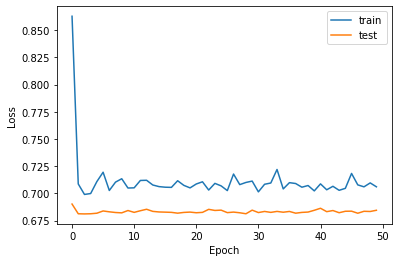

==============minmax===================
MAPE test is : 1.32398
MAPE test invert is : 0.75772
==============zscore===================
MAPE test is : 4161300.94126
MAPE test invert is : 0.46014
RMSE Testing is : 0.827
RMSE Testing invert is : 84.821
R2 test is : 0.31553


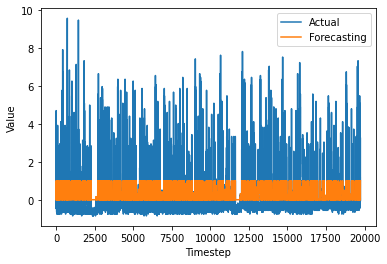

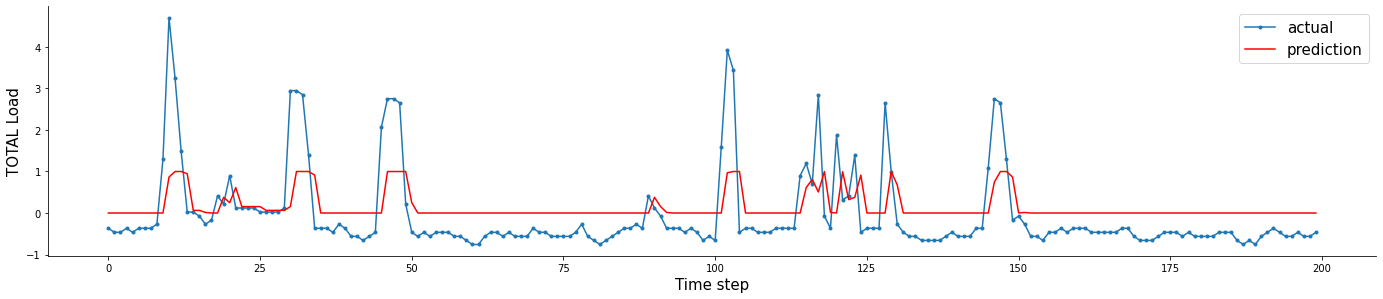

Epoch 1/50
198/198 [==============================] - 25s 38ms/step - loss: 0.8562 - val_loss: 0.6898
Epoch 2/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7140 - val_loss: 0.6842
Epoch 3/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7080 - val_loss: 0.6830
Epoch 4/50
198/198 [==============================] - 4s 21ms/step - loss: 0.7134 - val_loss: 0.6821
Epoch 5/50
198/198 [==============================] - 3s 14ms/step - loss: 0.7013 - val_loss: 0.6825
Epoch 6/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7024 - val_loss: 0.6812
Epoch 7/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7048 - val_loss: 0.6822
Epoch 8/50
198/198 [==============================] - 4s 21ms/step - loss: 0.7084 - val_loss: 0.6829
Epoch 9/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7038 - val_loss: 0.6826
Epoch 10/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7140 - val_l

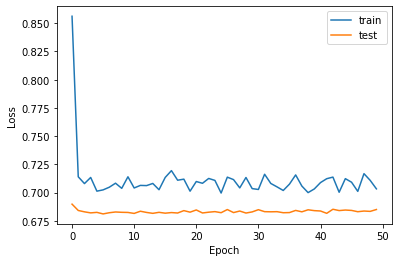

==============minmax===================
MAPE test is : 1.32456
MAPE test invert is : 0.75770
==============zscore===================
MAPE test is : 3967890.33374
MAPE test invert is : 0.46044
RMSE Testing is : 0.828
RMSE Testing invert is : 84.856
R2 test is : 0.31497


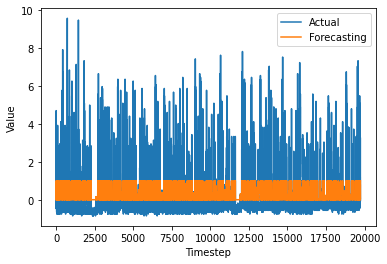

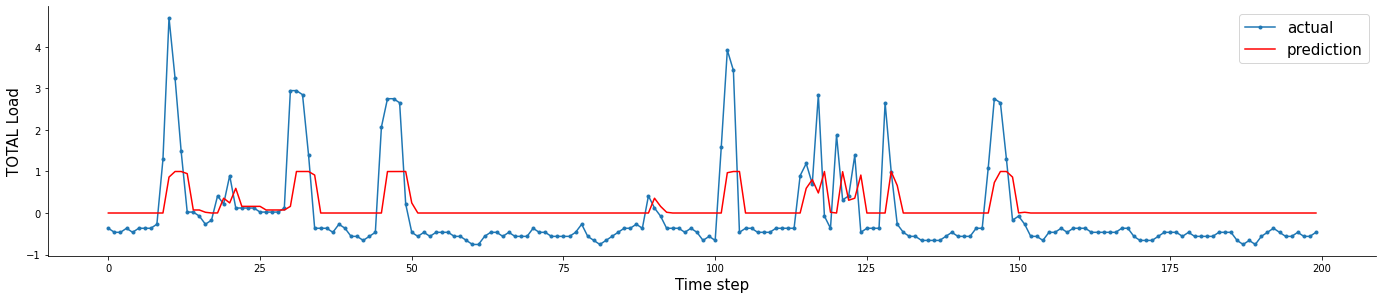

Epoch 1/50
198/198 [==============================] - 25s 40ms/step - loss: 0.8725 - val_loss: 0.6900
Epoch 2/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7157 - val_loss: 0.6837
Epoch 3/50
198/198 [==============================] - 4s 22ms/step - loss: 0.7127 - val_loss: 0.6827
Epoch 4/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7091 - val_loss: 0.6824
Epoch 5/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7048 - val_loss: 0.6823
Epoch 6/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7099 - val_loss: 0.6816
Epoch 7/50
198/198 [==============================] - 4s 21ms/step - loss: 0.7043 - val_loss: 0.6847
Epoch 8/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7143 - val_loss: 0.6830
Epoch 9/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7047 - val_loss: 0.6836
Epoch 10/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7154 - val_l

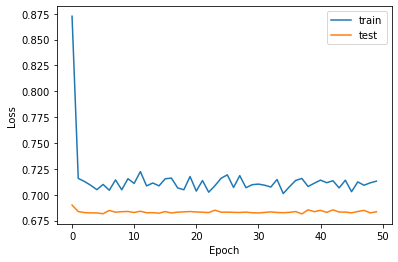

==============minmax===================
MAPE test is : 1.32644
MAPE test invert is : 0.75803
==============zscore===================
MAPE test is : 4069627.15255
MAPE test invert is : 0.45968
RMSE Testing is : 0.827
RMSE Testing invert is : 84.758
R2 test is : 0.31656


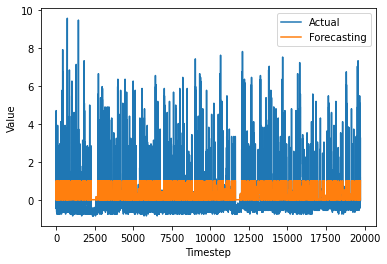

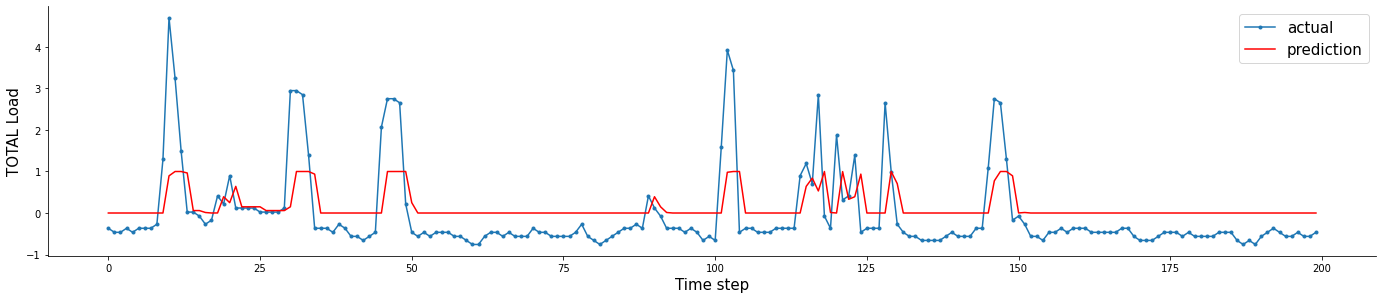

Epoch 1/50
198/198 [==============================] - 26s 35ms/step - loss: 0.8633 - val_loss: 0.6883
Epoch 2/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7112 - val_loss: 0.6823
Epoch 3/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7100 - val_loss: 0.6836
Epoch 4/50
198/198 [==============================] - 3s 17ms/step - loss: 0.7071 - val_loss: 0.6832
Epoch 5/50
198/198 [==============================] - 4s 20ms/step - loss: 0.7067 - val_loss: 0.6818
Epoch 6/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7101 - val_loss: 0.6821
Epoch 7/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7082 - val_loss: 0.6819
Epoch 8/50
198/198 [==============================] - 4s 18ms/step - loss: 0.7130 - val_loss: 0.6825
Epoch 9/50
198/198 [==============================] - 4s 19ms/step - loss: 0.7054 - val_loss: 0.6831
Epoch 10/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7056 - val_l

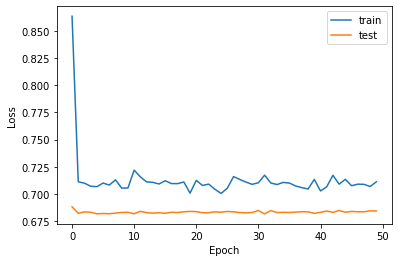

==============minmax===================
MAPE test is : 1.33384
MAPE test invert is : 0.75809
==============zscore===================
MAPE test is : 4057402.45331
MAPE test invert is : 0.46027
RMSE Testing is : 0.827
RMSE Testing invert is : 84.817
R2 test is : 0.31559


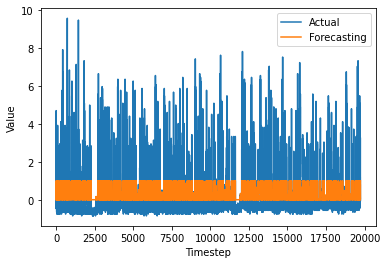

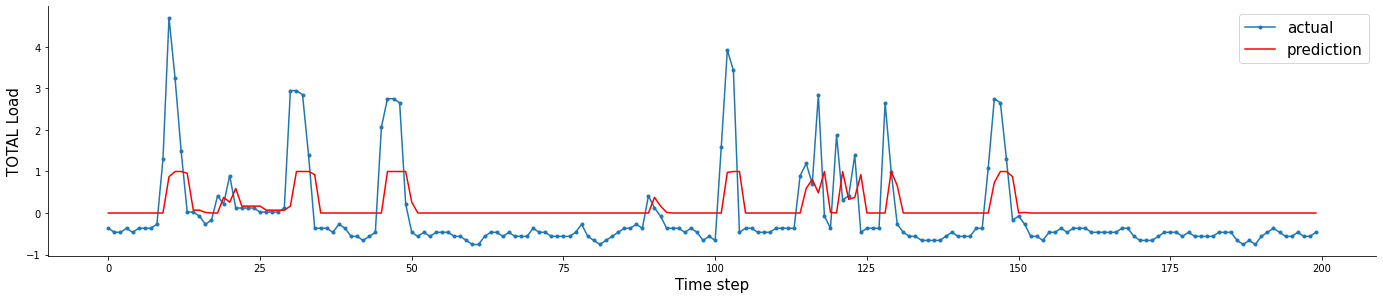

Epoch 1/50
198/198 [==============================] - 26s 31ms/step - loss: 0.8688 - val_loss: 0.6911
Epoch 2/50
198/198 [==============================] - 4s 21ms/step - loss: 0.7149 - val_loss: 0.6832
Epoch 3/50
198/198 [==============================] - 3s 17ms/step - loss: 0.7085 - val_loss: 0.6814
Epoch 4/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7092 - val_loss: 0.6830
Epoch 5/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7039 - val_loss: 0.6816
Epoch 6/50
198/198 [==============================] - 4s 22ms/step - loss: 0.7181 - val_loss: 0.6837
Epoch 7/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7051 - val_loss: 0.6815
Epoch 8/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7081 - val_loss: 0.6817
Epoch 9/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7064 - val_loss: 0.6838
Epoch 10/50
198/198 [==============================] - 4s 22ms/step - loss: 0.7086 - val_l

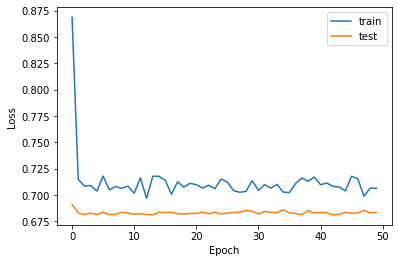

==============minmax===================
MAPE test is : 1.33410
MAPE test invert is : 0.75854
==============zscore===================
MAPE test is : 1915523.20047
MAPE test invert is : 0.45977
RMSE Testing is : 0.827
RMSE Testing invert is : 84.759
R2 test is : 0.31654


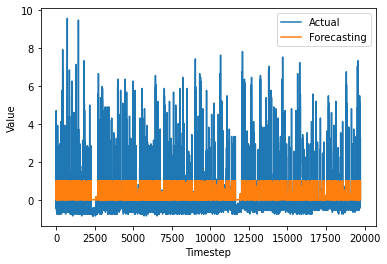

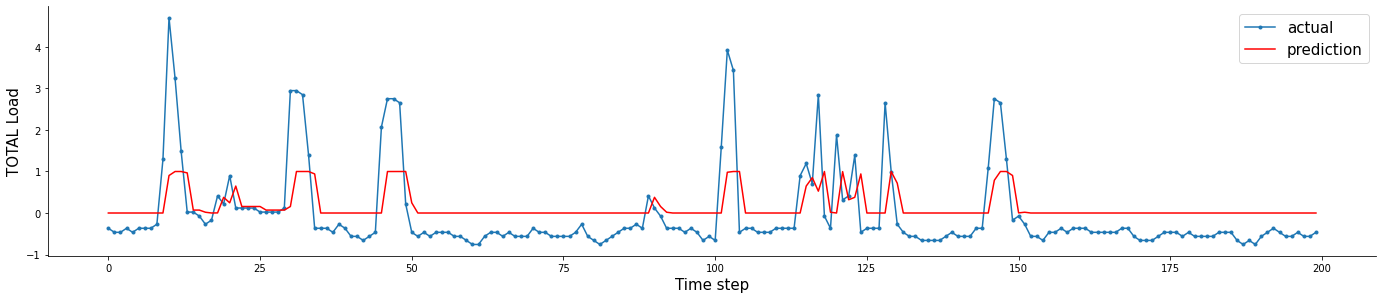

,0,1,2,3,4,nama
0,"1,3239794413378982","1,324558778706058","1,32644064658688","1,3338417821510047","1,3341002212311805",mminmax
1,"0,7577237313556199","0,7577019424455196","0,7580277122886997","0,7580857345288874","0,7585441771022431",minmax invert
2,"4161300,9412626917","3967890,3337358176","4069627,1525475755","4057402,4533055313","1915523,2004737684",zscore
3,"0,4601384755107713","0,46044252797385776","0,4596769304986691","0,46027445145980433","0,45977288709777187",zscpre invert
4,0.8273427249496634,0.82768223113498,0.8267253977868164,0.8273069639777546,0.8267347597640569,rmse
5,"84,82107322961527","84,85588018220967","84,75778343337072","84,81740693277654","84,7587432447441",rmse invert
6,"0,3155340109865017","0,3149721443998691","0,3165550674218707","0,31559318027455674","0,31653958844384655",r2
7,297,217,191,193,197,waktu


In [19]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  model = Sequential()

  model.add(Bidirectional(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.show()
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## tanh minmax

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  model = Sequential()

  model.add(Bidirectional(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto2") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto2")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto2")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig minmax

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto3
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()

  model.add(Bidirectional(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto3") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto3")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto3")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig zscore

Epoch 1/50
198/198 [==============================] - 18s 29ms/step - loss: 1.0209 - val_loss: 0.9978
Epoch 2/50
198/198 [==============================] - 3s 16ms/step - loss: 0.9975 - val_loss: 0.9931
Epoch 3/50
198/198 [==============================] - 3s 14ms/step - loss: 0.9848 - val_loss: 0.9662
Epoch 4/50
198/198 [==============================] - 3s 14ms/step - loss: 0.9449 - val_loss: 0.8875
Epoch 5/50
198/198 [==============================] - 3s 14ms/step - loss: 0.8417 - val_loss: 0.7644
Epoch 6/50
198/198 [==============================] - 4s 19ms/step - loss: 0.7615 - val_loss: 0.7088
Epoch 7/50
198/198 [==============================] - 3s 14ms/step - loss: 0.7307 - val_loss: 0.6938
Epoch 8/50
198/198 [==============================] - 3s 14ms/step - loss: 0.7266 - val_loss: 0.6921
Epoch 9/50
198/198 [==============================] - 3s 14ms/step - loss: 0.7220 - val_loss: 0.6904
Epoch 10/50
198/198 [==============================] - 4s 19ms/step - loss: 0.7194 - val_l

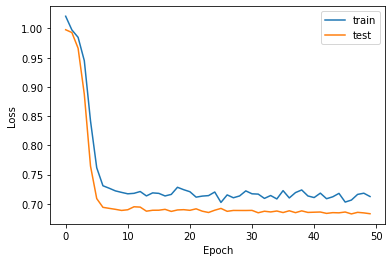

==============minmax===================
MAPE test is : 1.29413
MAPE test invert is : 0.75867
==============zscore===================
MAPE test is : 1002.94289
MAPE test invert is : 0.45947
RMSE Testing is : 0.826
RMSE Testing invert is : 84.720
R2 test is : 0.31717


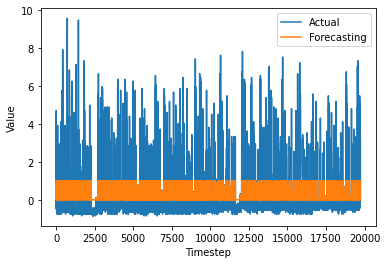

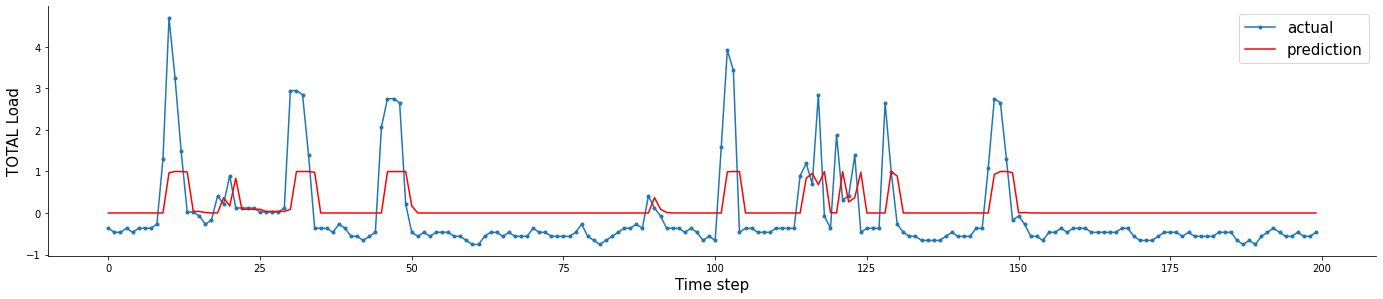

Epoch 1/50
198/198 [==============================] - 15s 20ms/step - loss: 1.0384 - val_loss: 0.9986
Epoch 2/50
198/198 [==============================] - 3s 14ms/step - loss: 0.9978 - val_loss: 0.9941
Epoch 3/50
198/198 [==============================] - 4s 20ms/step - loss: 0.9900 - val_loss: 0.9733
Epoch 4/50
198/198 [==============================] - 3s 15ms/step - loss: 0.9577 - val_loss: 0.9078
Epoch 5/50
198/198 [==============================] - 3s 14ms/step - loss: 0.8718 - val_loss: 0.7980
Epoch 6/50
198/198 [==============================] - 4s 20ms/step - loss: 0.7844 - val_loss: 0.7250
Epoch 7/50
198/198 [==============================] - 4s 20ms/step - loss: 0.7470 - val_loss: 0.7020
Epoch 8/50
198/198 [==============================] - 3s 14ms/step - loss: 0.7295 - val_loss: 0.6980
Epoch 9/50
198/198 [==============================] - 3s 14ms/step - loss: 0.7097 - val_loss: 0.6964
Epoch 10/50
198/198 [==============================] - 3s 14ms/step - loss: 0.7243 - val_l

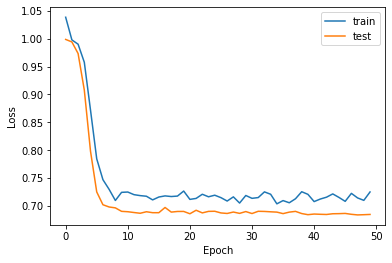

==============minmax===================
MAPE test is : 1.26754
MAPE test invert is : 0.75765
==============zscore===================
MAPE test is : 828.00981
MAPE test invert is : 0.46050
RMSE Testing is : 0.827
RMSE Testing invert is : 84.828
R2 test is : 0.31543


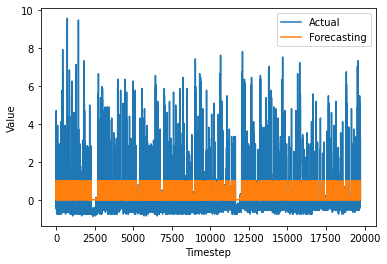

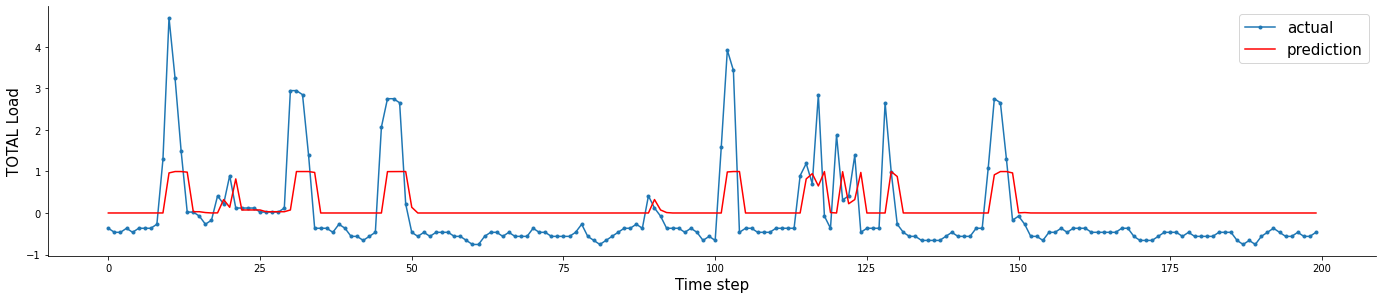

Epoch 1/50
198/198 [==============================] - 17s 21ms/step - loss: 1.0239 - val_loss: 0.9980
Epoch 2/50
198/198 [==============================] - 3s 15ms/step - loss: 0.9973 - val_loss: 0.9931
Epoch 3/50
198/198 [==============================] - 4s 20ms/step - loss: 0.9850 - val_loss: 0.9664
Epoch 4/50
198/198 [==============================] - 3s 16ms/step - loss: 0.9446 - val_loss: 0.8781
Epoch 5/50
198/198 [==============================] - 3s 15ms/step - loss: 0.8343 - val_loss: 0.7481
Epoch 6/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7484 - val_loss: 0.7026
Epoch 7/50
198/198 [==============================] - 4s 20ms/step - loss: 0.7216 - val_loss: 0.6930
Epoch 8/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7164 - val_loss: 0.6947
Epoch 9/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7190 - val_loss: 0.6912
Epoch 10/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7128 - val_l

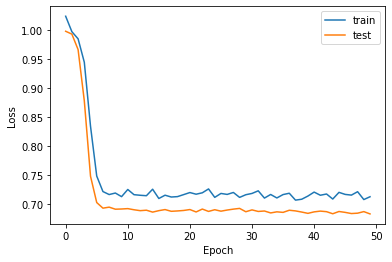

==============minmax===================
MAPE test is : 1.29247
MAPE test invert is : 0.75901
==============zscore===================
MAPE test is : 780.30012
MAPE test invert is : 0.45965
RMSE Testing is : 0.826
RMSE Testing invert is : 84.730
R2 test is : 0.31700


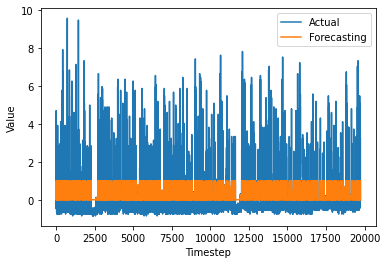

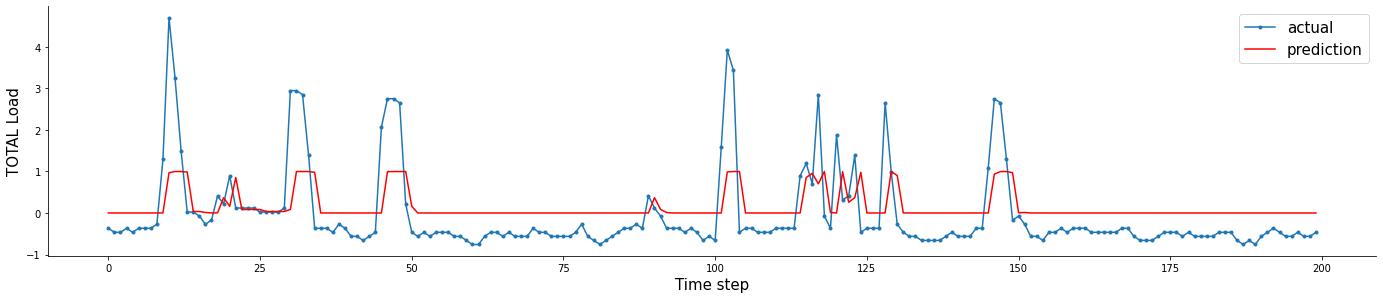

Epoch 1/50
198/198 [==============================] - 15s 20ms/step - loss: 1.0142 - val_loss: 0.9984
Epoch 2/50
198/198 [==============================] - 4s 20ms/step - loss: 0.9975 - val_loss: 0.9929
Epoch 3/50
198/198 [==============================] - 3s 14ms/step - loss: 0.9834 - val_loss: 0.9602
Epoch 4/50
198/198 [==============================] - 3s 15ms/step - loss: 0.9296 - val_loss: 0.8614
Epoch 5/50
198/198 [==============================] - 3s 15ms/step - loss: 0.8222 - val_loss: 0.7457
Epoch 6/50
198/198 [==============================] - 4s 20ms/step - loss: 0.7483 - val_loss: 0.7037
Epoch 7/50
198/198 [==============================] - 3s 15ms/step - loss: 0.7275 - val_loss: 0.6949
Epoch 8/50
198/198 [==============================] - 3s 14ms/step - loss: 0.7205 - val_loss: 0.6951
Epoch 9/50
198/198 [==============================] - 3s 14ms/step - loss: 0.7181 - val_loss: 0.6930
Epoch 10/50
198/198 [==============================] - 4s 20ms/step - loss: 0.7210 - val_l

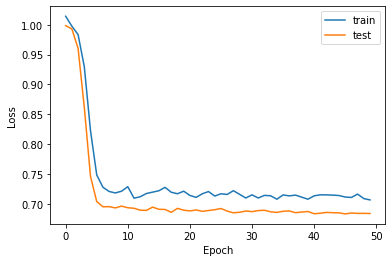

==============minmax===================
MAPE test is : 1.28982
MAPE test invert is : 0.75764
==============zscore===================
MAPE test is : 1358.58824
MAPE test invert is : 0.45964
RMSE Testing is : 0.827
RMSE Testing invert is : 84.767
R2 test is : 0.31640


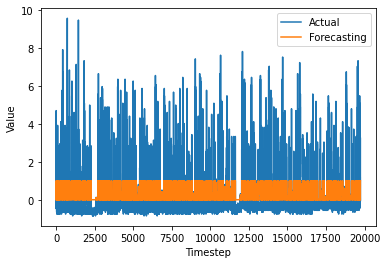

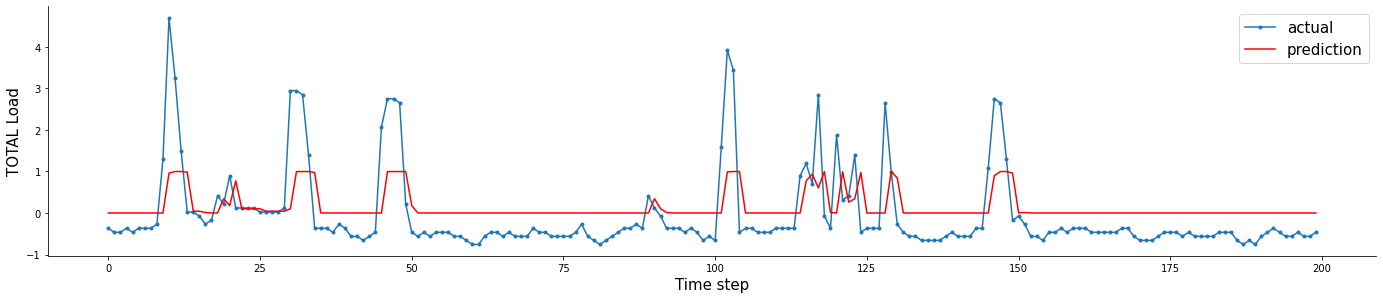

Epoch 1/50
198/198 [==============================] - 17s 22ms/step - loss: 1.0177 - val_loss: 0.9980
Epoch 2/50
198/198 [==============================] - 4s 20ms/step - loss: 0.9968 - val_loss: 0.9919
Epoch 3/50
198/198 [==============================] - 3s 16ms/step - loss: 0.9836 - val_loss: 0.9591
Epoch 4/50
198/198 [==============================] - 3s 15ms/step - loss: 0.9283 - val_loss: 0.8586
Epoch 5/50
198/198 [==============================] - 3s 16ms/step - loss: 0.8190 - val_loss: 0.7478
Epoch 6/50
198/198 [==============================] - 4s 20ms/step - loss: 0.7582 - val_loss: 0.7053
Epoch 7/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7262 - val_loss: 0.6955
Epoch 8/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7254 - val_loss: 0.6912
Epoch 9/50
198/198 [==============================] - 4s 22ms/step - loss: 0.7178 - val_loss: 0.6920
Epoch 10/50
198/198 [==============================] - 3s 16ms/step - loss: 0.7190 - val_l

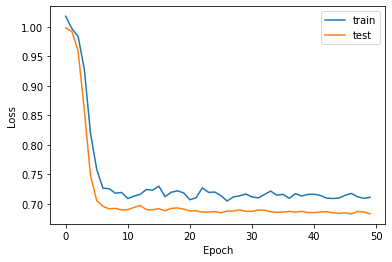

==============minmax===================
MAPE test is : 1.29318
MAPE test invert is : 0.75911
==============zscore===================
MAPE test is : 751.67315
MAPE test invert is : 0.45957
RMSE Testing is : 0.826
RMSE Testing invert is : 84.715
R2 test is : 0.31724


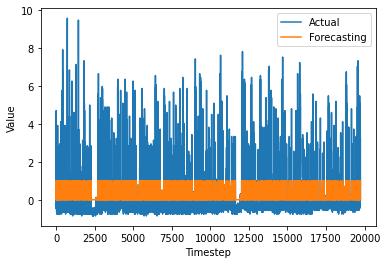

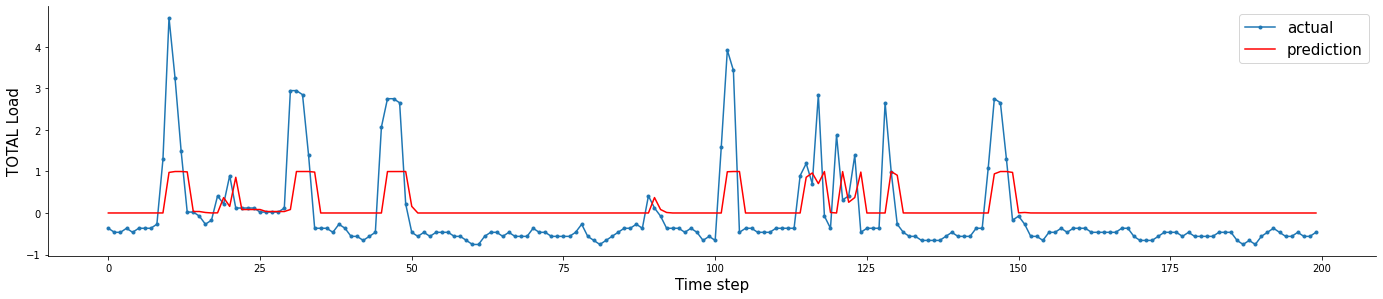

,0,1,2,3,4,nama
0,"1,2941253840540272","1,26753818842905","1,2924693900787285","1,289824724947895","1,2931774306042554",mminmax
1,"0,7586714930149713","0,7576531262131099","0,7590076799126331","0,7576364940555687","0,7591142897263172",minmax invert
2,"1002,9428913173656","828,0098054782817","780,3001171247847","1358,5882358413617","751,6731515759943",zscore
3,"0,4594720888933325","0,4605018944029746","0,4596498491230836","0,45964374720458856","0,4595674165809232",zscpre invert
4,0.8263520926954429,0.8274071921064416,0.826457777692133,0.8268174504263163,0.8263123036341805,rmse
5,"84,71951133942765","84,8276825503491","84,7303464076203","84,7672208810457","84,71543207363212",rmse invert
6,"0,3171721426232713","0,3154273386388975","0,31699747307217474","0,3164028611083395","0,3172378977065825",r2
7,215,168,215,213,215,waktu


In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto4
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()

  model.add(Bidirectional(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.compile(loss='mse', optimizer='rmsprop')




  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto4") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto4")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto4")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

# 5 run random

## tanh zscore

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto5
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network LSTM
  model = Sequential()

  model.add(Bidirectional(LSTM(18, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.compile(loss='mae', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=81, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start
  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto5") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto5")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto5")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## tanh minmax

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto6
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()

  model.add(Bidirectional(LSTM(18, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='tanh')))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.compile(loss='mae', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=81, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start
  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto6") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto6")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto6")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig minmax

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto7
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(10):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()

  model.add(Bidirectional(LSTM(18, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.compile(loss='mae', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=81, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto7") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto7")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto7")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig zscore

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto8
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()

  model.add(Bidirectional(LSTM(18, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Bidirectional(LSTM(units = 18, return_sequences = True, activation='sigmoid')))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.compile(loss='mae', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=81, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto8") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]


  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto8")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto8")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc